# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* Ann-Kristin Bergmann
* Nephele Aesopou
* Ewa Miazga

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.4 PageRank

In [266]:
# Imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from random import sample, choice

In [267]:
# Get the graphs
DATA_DIR = './../data/'

cmpG = nx.DiGraph()
cmpG = nx.read_adjlist(f'{DATA_DIR}components.graph', create_using=nx.DiGraph)

absG = nx.Graph()
absG = nx.read_adjlist(f'{DATA_DIR}absorbing.graph', create_using=nx.DiGraph)

In [268]:
# Draw the graphs
def draw_graph(G, title):
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.set_title(f'{title}')

    options = {
    'node_color': 'lightgreen',
    'node_size': 400,
    'width': 0.4,
    'arrowstyle': '->',
    'arrowsize': 20,
    }
    nx.draw_networkx(G, arrows=True, **options, pos=nx.spring_layout(G, k=0.8), ax=ax)

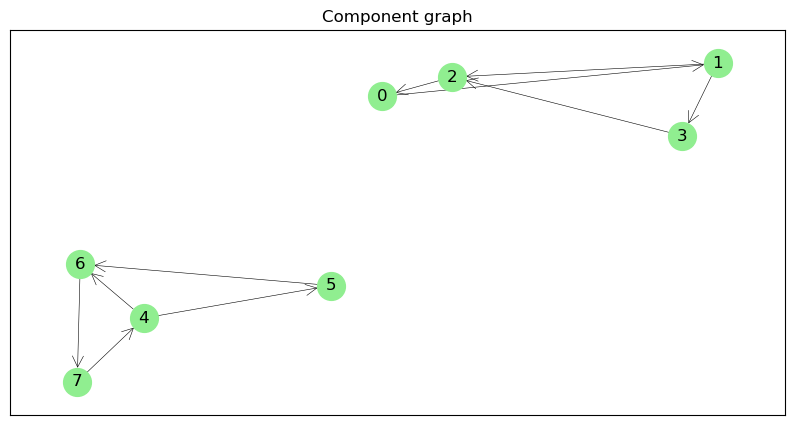

In [269]:
draw_graph(cmpG, 'Component graph')

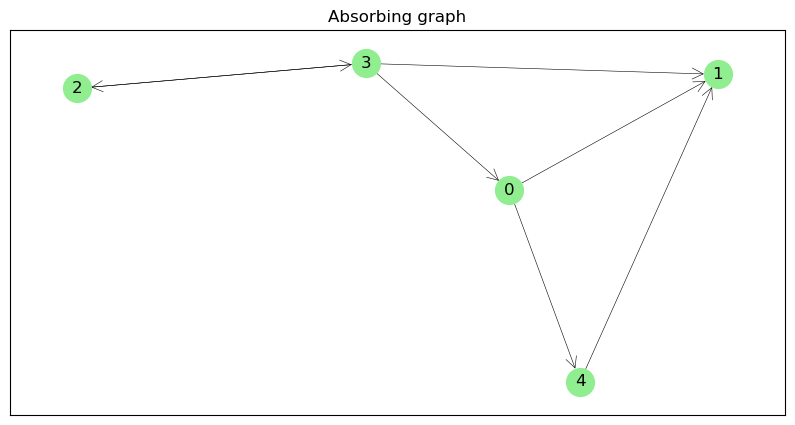

In [270]:
draw_graph(absG, 'Absorbing graph')

---

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [271]:
# Implementation of random surfer algorithm

max_iter = 100

# Helper function for calculating the score of each node
def normalize_dict(d):
    factor=1.0/sum(d.values())
    for k in d:
        d[k] = d[k]*factor
    return d

# Helper function for checking if graph is directed
def convert_to_directed(G):
    if not nx.is_directed(G):
        print('Graph converted to directed..')
        G = G.to_directed() 
    return G

def random_surfer(G, max_iter):
    G = convert_to_directed(G)
    cnt_dict = {}
    node = random.choice(list(G.nodes))
    for i in range(max_iter):
        cnt_dict.setdefault(f'{node}', 0)
        cnt_dict[f'{node}'] += 1
        try:
            node = random.choice(list(G.successors(f'{node}')))
        except IndexError:
            print(f"Node {node} is a dangling node!")
            break
    return normalize_dict(cnt_dict)

In [272]:
print(f'Component graph info: {random_surfer(cmpG, max_iter)}')

Component graph info: {'1': 0.3, '2': 0.29, '0': 0.29, '3': 0.12}


In [273]:
print(f'Absorbing graph info: {random_surfer(absG, max_iter)}')

Node 1 is a dangling node!
Absorbing graph info: {'2': 0.25, '3': 0.25, '0': 0.25, '1': 0.25}


## What happens? What do you think is causing this behavior?:

### Component Graph:
The graph is split into two parts, so we are unable to get from each node to the rest of the graph.

### Absorbing Graph:
The graph has one absorbing node, which is the node 1. If our algorithm ended up in this node, we are unable to run the algorithm further.

---

### 2.4.1 Random Surfer Model

#### Exercise 2.13

In [274]:
# Implemenation of the random surfer algorithm that overcomes the issues above -> pageRank

max_iter = 100
damping_factor = 0.15

def pageRank(G, max_iter, damping_factor):
    G = convert_to_directed(G)
    cnt_dict = {}
    
    node = random.choice(list(G.nodes))
    for i in range(max_iter): 
        if random.uniform(0,1) < damping_factor:
            node = random.choice(list(G.nodes))
            print(f'Randomly Restarting the surfer from node {node}')
        else:
            cnt_dict.setdefault(f'{node}', 0)
            cnt_dict[f'{node}'] += 1
            try:
                node = random.choice(list(G.successors(f'{node}')))
            except IndexError:
                print(f"node = random.choice(list(G.nodes))Node {node} is a dangling node!")
                node = random.choice(list(G.nodes))
                print(f'Restarting the surfer from node {node}')
    return normalize_dict(cnt_dict)


In [275]:
print(f'Component graph info: \n{pageRank(cmpG, max_iter, damping_factor)}')

Randomly Restarting the surfer from node 7
Randomly Restarting the surfer from node 3
Randomly Restarting the surfer from node 7
Randomly Restarting the surfer from node 7
Randomly Restarting the surfer from node 6
Randomly Restarting the surfer from node 5
Randomly Restarting the surfer from node 1
Randomly Restarting the surfer from node 7
Randomly Restarting the surfer from node 4
Randomly Restarting the surfer from node 7
Randomly Restarting the surfer from node 0
Randomly Restarting the surfer from node 3
Randomly Restarting the surfer from node 2
Randomly Restarting the surfer from node 4
Randomly Restarting the surfer from node 5
Component graph info: 
{'4': 0.22352941176470587, '5': 0.1411764705882353, '6': 0.18823529411764706, '7': 0.22352941176470587, '3': 0.03529411764705882, '2': 0.07058823529411765, '0': 0.058823529411764705, '1': 0.058823529411764705}


In [276]:
print(f'Absorbing graph info: \n{pageRank(absG, max_iter = 100, damping_factor = 0.15)}')

Randomly Restarting the surfer from node 0
Randomly Restarting the surfer from node 1
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 4
Randomly Restarting the surfer from node 4
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 3
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 3
Randomly Restarting the surfer from node 2
Randomly Restarting the surfer from node 4
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 0
Randomly Restarting the surfer from node 2
Randomly Restarting the surfer from node 4
Randomly Restarting the surfer from node 0
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 0
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 2
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the sur

## Do you think that the PageRank scores make intuitive sense?

### Component Graph:
Yes, and all the graph's nodes have chance to be choosen.

### Absorbing Graph:
Yes, the node with the biggest in-degree is node 1, and it has the largest probability - score.

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [277]:
# Displays the plot which shows how the algorithm converages
def convergence_speed(num_iter, NORM):
    plt.figure(figsize=(5,4))
    plt.plot(range(num_iter+1), NORM)
    plt.xlabel('iterations')
    plt.ylabel('Euclidean Norm')
    plt.title('Convergence plot')
    return plt.show()

In [278]:
# Helper funtion to calculate the google matrix

# In this matrix all nodes are connected, and the damping factor(d) allows to avoid
# cycling surfing.

def get_google_matrix(G, d=0.15):
    n = G.number_of_nodes()
    gM = np.zeros((n, n))
    for i, node in zip(range(n), G.nodes()):
        successors = list(G.successors(node))
        if len(successors) > 0: 
            gM[i] = np.ones(n) * ((1-d)/n)
            for succ in successors:
                gM[i, int(succ)] += d/len(successors)
        else:
            gM[i] = np.ones(n) * (1/n)
    return gM
    

In [279]:
print(get_google_matrix(absG))

[[0.17  0.245 0.17  0.17  0.245]
 [0.2   0.2   0.2   0.2   0.2  ]
 [0.17  0.32  0.17  0.17  0.17 ]
 [0.17  0.17  0.17  0.32  0.17 ]
 [0.22  0.22  0.22  0.17  0.17 ]]


In [280]:
# Implementation of pageRank with power iteration method
def pagerank_power(G, d=0.15, max_iter=100, eps=1e-7, display_convergence_speed=False):
    gM = get_google_matrix(G, d=d)
    n = G.number_of_nodes()
    scores = np.ones(n)/n

    norms = []
    for i in range(max_iter):
        last_scores = scores
        scores = np.dot(scores, gM)
        L2 = np.linalg.norm(scores-last_scores)
        norms.append(L2)
        if L2 < eps:
            print(f'Converged at {i+1} iterations..')
            break
    if display_convergence_speed:
        convergence_speed(i, norms)
    return scores

Converged at 7 iterations..


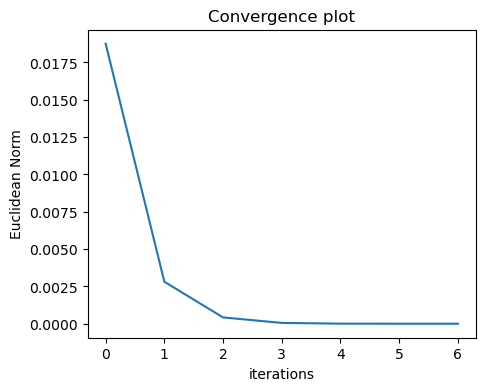

Component graph info: 
[0.12619763 0.12517965 0.13298424 0.11563847 0.12517965 0.11563847
 0.13298424 0.12619763]


In [284]:
print(f'Component graph info: \n{pagerank_power(cmpG, display_convergence_speed=True)}')

In [285]:
wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)

Converged at 5 iterations..


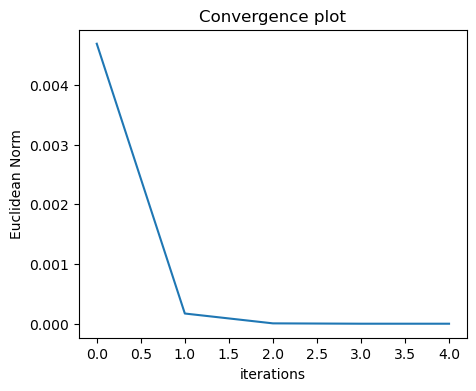

Wiki graph info: 
[0.00019406 0.00016085 0.00020125 ... 0.00016709 0.00016268 0.00017944]


In [286]:
print(f'Wiki graph info: \n{pagerank_power(wikiG, display_convergence_speed=True)}')

In [287]:
def graph_to_dataframe(G):
    return pd.read_csv(f'{DATA_DIR}wikipedia_titles.tsv', sep='\t', index_col=0)

def get_highest_scores_pages(G, how_many):
    arr = pagerank_power(G)
    return arr.argsort()[-how_many:][::-1]

def get_webpage_names(G, how_many):
    ind = get_highest_scores_pages(G, how_many)
    wiki_pd = graph_to_dataframe(G)
    return wiki_pd.iloc[list(ind)]

In [288]:
print(f'What are the top 10 pages with the highest PageRank score? \n')
get_webpage_names(wikiG, 10)

What are the top 10 pages with the highest PageRank score? 

Converged at 5 iterations..


,page_title
#page_id,
5210,United States
5201,United Kingdom
1811,England
2034,France
1890,Europe
889,Biological classification
542,Animal
3141,London
5477,World War II


---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*

In [289]:
# 1. Original pageRank
wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)

def get_score(G, page_name):
    wiki_pd = graph_to_dataframe(G)
    id = wiki_pd.loc[wiki_pd['page_title'] == page_name].index
    return id, pagerank_power(G)[id[0]]


id, score1 = get_score(wikiG, 'History of mathematics')
print(f'Score for node: {id[0]} is equal to: {score1}')

Converged at 5 iterations..
Score for node: 2463 is equal to: 0.0001590554593000146


In [290]:
# 2. Add 300 edges randomly
wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)
random.seed(1204)


def add_random_edges(G, to_node, edges_budget):
    random_nodes = random.sample(G.nodes(), edges_budget)
    new_edges = [(to_node, i) for i in random_nodes]
    G.add_edges_from(new_edges)

add_random_edges(wikiG, str(id[0]), 300)

id, score2 = get_score(wikiG, 'History of mathematics')
print(f'Score for node: {id[0]} is equal to: {score3}')

print(f'Is result better than default one? {score1 < score2}')

C:\Users\ewa.miazga\AppData\Local\Temp\ipykernel_11456\1349703681.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G.nodes(), edges_budget)


Converged at 5 iterations..
Score for node: 2463 is equal to: 0.0008911172367830491
Is result better than default one? True


In [291]:
# 3. Add edges between highest scored pages and those with highest out degrees values

wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)
from operator import itemgetter

def add_edges(G, to_node, edges_budget):
    list_of_tuples = []
    
    arr = pagerank_power(G)
    ind = [val[0] for val in G.degree()]
    degrees = [G.out_degree(i) for i in ind]
        
    for i, rank, deg, in zip(ind, arr, degrees):
        list_of_tuples.append((i, rank, deg))
        
    list_of_tuples.sort(key=itemgetter(1, 2))
    ind = [i[0] for i in list_of_tuples]
    ind = ind[-edges_budget:][::-1]
        
    new_edges = [(i, to_node) for i in ind]
    G.add_edges_from(new_edges)
    return G

wikiG = add_edges(wikiG, str(id[0]), 300)

id, score3 = get_score(wikiG, 'History of mathematics')
print(f'Score for node: {id[0]} is equal to: {score3}')

print(f'Is result better than default one? {score1 < score3}')
print(f'Is result better than the try with adding random edges? {score2 < score3}')


Converged at 5 iterations..
Converged at 5 iterations..
Score for node: 2463 is equal to: 0.0008911172367830491
Is result better than default one? True
Is result better than the try with adding random edges? True


In [292]:
# 4. Add edges between highest scored pages and our page
wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)

def add_edges(G, to_node, edges_budget):
    ind = get_highest_scores_pages(G, edges_budget)
    new_edges = [(i, to_node) for i in ind]
    G.add_edges_from(new_edges)

add_edges(wikiG, str(id[0]), 300)

id, score4 = get_score(wikiG, 'History of mathematics')
print(f'Score for node: {id[0]} is equal to: {score4}')

print(f'Is result better than default one? {score1 < score4}')
print(f'Is result better than the try with adding random edges? {score2 < score4}')
print(f'Is result better than the try with adding edges based on ranking and degree? {score3 < score4}')

print(f'\nWhat are the top 10 pages with the highest PageRank score after manipulation? \n')
get_webpage_names(wiki_graph, 10)

Converged at 5 iterations..
Converged at 5 iterations..
Score for node: 2463 is equal to: 0.006701976851797595
Is result better than default one? True
Is result better than the try with adding random edges? True
Is result better than the try with adding edges based on ranking and degree? True

What are the top 10 pages with the highest PageRank score after manipulation? 

Converged at 5 iterations..


,page_title
#page_id,
2463,History of mathematics
5210,United States
5201,United Kingdom
1811,England
2034,France
1890,Europe
889,Biological classification
542,Animal
3141,London
